- In the machine learning we do have lof of techniques of getting imputation in the data.
- Imputation means filling the null value or missing value inside the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.DataFrame(data=np.random.rand(1,36).reshape(6,6),columns=list('ABCDEF'))

In [3]:
dataframe.iloc[1:2,2:3]=np.nan

In [4]:
dataframe

,A,B,C,D,E,F
0,0.216257,0.572536,0.010112,0.740904,0.683471,0.191649
1,0.384831,0.311177,NaN,0.434986,0.542877,0.873407
2,0.386337,0.840170,0.774171,0.039783,0.708082,0.259514
3,0.776272,0.207727,0.753444,0.097442,0.133045,0.374047
4,0.217960,0.993427,0.009925,0.604368,0.633675,0.175932
5,0.291271,0.185398,0.073803,0.734316,0.477217,0.313725


### 1.Fillna()

In [5]:
data = dataframe.copy()

In [6]:
data.fillna(12) #need to imput overall dataframe in one time.

,A,B,C,D,E,F
0,0.216257,0.572536,0.010112,0.740904,0.683471,0.191649
1,0.384831,0.311177,12.000000,0.434986,0.542877,0.873407
2,0.386337,0.840170,0.774171,0.039783,0.708082,0.259514
3,0.776272,0.207727,0.753444,0.097442,0.133045,0.374047
4,0.217960,0.993427,0.009925,0.604368,0.633675,0.175932
5,0.291271,0.185398,0.073803,0.734316,0.477217,0.313725


### 2.Fillna with specific Criteria.

In [7]:
x=pd.date_range(start='1/01/2018', end='1/06/2018')

In [8]:
len(x)

6

In [9]:
dataframe.index = x

In [10]:
dataframe

,A,B,C,D,E,F
2018-01-01,0.216257,0.572536,0.010112,0.740904,0.683471,0.191649
2018-01-02,0.384831,0.311177,NaN,0.434986,0.542877,0.873407
2018-01-03,0.386337,0.840170,0.774171,0.039783,0.708082,0.259514
2018-01-04,0.776272,0.207727,0.753444,0.097442,0.133045,0.374047
2018-01-05,0.217960,0.993427,0.009925,0.604368,0.633675,0.175932
2018-01-06,0.291271,0.185398,0.073803,0.734316,0.477217,0.313725


Here we are able to get the 2nd jan with Null value that is nothing but the missing value.

<AxesSubplot:>

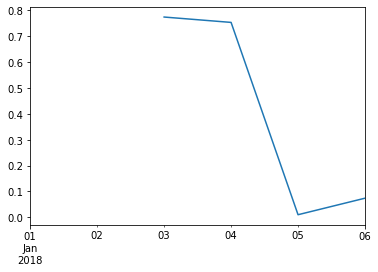

In [11]:
dataframe['C'].plot()

- In this kind problem statement we have the Time Series analysis we always prefer the last data in order to predict the future data or anything.
- In this kind of use case what we are going to use `pd.ffill()`.

In [12]:
ffill_method =dataframe['C'].fillna(method='ffill') #It is going the fill null value from top to bottom.

In [13]:
ffill_method

2018-01-01    0.010112
2018-01-02    0.010112
2018-01-03    0.774171
2018-01-04    0.753444
2018-01-05    0.009925
2018-01-06    0.073803
Freq: D, Name: C, dtype: float64

In general case if we want to fill the null value with backword direction that means the direction of filling the null value from bottom to top that time we will use the `bfill`

In [14]:
bfill_method =dataframe['C'].fillna(method='bfill')#It is going the fill value from bottom to top approache.
bfill_method

2018-01-01    0.010112
2018-01-02    0.774171
2018-01-03    0.774171
2018-01-04    0.753444
2018-01-05    0.009925
2018-01-06    0.073803
Freq: D, Name: C, dtype: float64

In [15]:
padd_method =dataframe['C'].fillna(method='pad',limit=1)#we have to give the limit for padd filling.
padd_method

2018-01-01    0.010112
2018-01-02    0.010112
2018-01-03    0.774171
2018-01-04    0.753444
2018-01-05    0.009925
2018-01-06    0.073803
Freq: D, Name: C, dtype: float64

## Stastical Assumption while imputing the values inside the specific column of DataFrame.

- It all depends upon the distribution of data and domain knowledge.

In [16]:
data

,A,B,C,D,E,F
0,0.216257,0.572536,0.010112,0.740904,0.683471,0.191649
1,0.384831,0.311177,NaN,0.434986,0.542877,0.873407
2,0.386337,0.840170,0.774171,0.039783,0.708082,0.259514
3,0.776272,0.207727,0.753444,0.097442,0.133045,0.374047
4,0.217960,0.993427,0.009925,0.604368,0.633675,0.175932
5,0.291271,0.185398,0.073803,0.734316,0.477217,0.313725


There are three kind of data distribution in general for imputing
- Right Skewed Data
- Left Skewed Data
- Normal Data Distribution.

### Right skewed Data Distribution.
- Here our mean is getting shifted towrads the right side that is why it is called as right skewed data.
- In this case of mean is way greater than our median inside the data.
- In this we will prfer to use the median instead of mean while imputing in order to get the unbiased prediction.



### Left skewed Data Distribution.
- Here our mean is getting shifted towrads the left side that is why it is called as left skewed data.
- In this case of mean is way lesser than our median inside the data.
- In this we will prfer to use the mean instead of median while imputing in order to get the unbiased prediction.

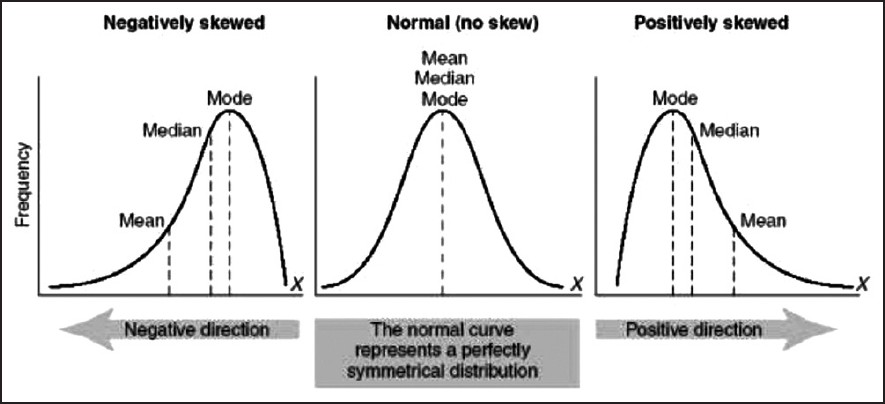

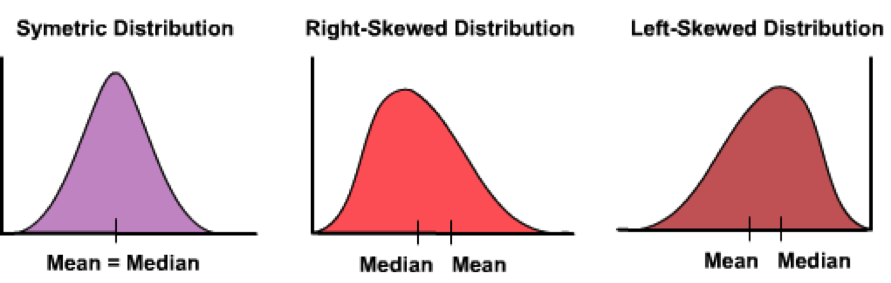

## Categorical Impuation.

Whichever the category giving us the higher value count that category we will going to select in order to impute the null value.

## Scikit-Learn Imputation Technique.

- **KNN_Imputer**

In [17]:
from sklearn.impute import KNNImputer,SimpleImputer

- Datasets may have missing values, and this can cause problems for many machine learning algorithms.

- As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

- A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.”

### Lets see.

In [19]:
import pandas as pd
import numpy as np
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [20]:
pd.set_option('display.max_columns', 500)

In [21]:
# summarize the first few rows
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [22]:
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


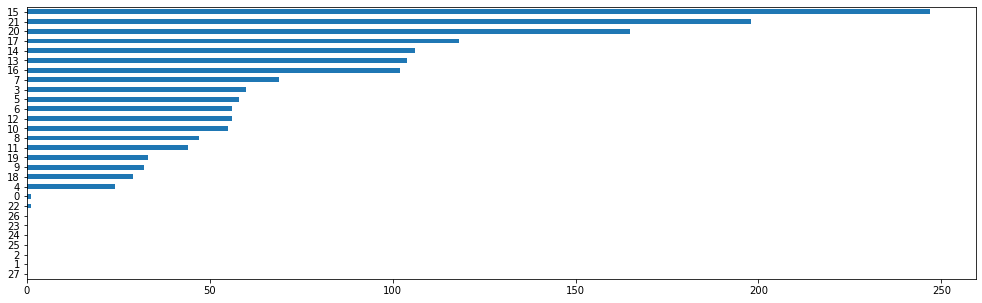

In [23]:
import matplotlib.pyplot as plt
dataframe.isnull().sum().sort_values(ascending=True).plot(figsize=(17,5),kind='barh')
plt.show()

### KNN_Data Transformation.

- KNNImputer is a data transform that is first configured based on the method used to estimate the missing values.

- The default distance measure is a Euclidean distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the “metric” argument.

- The number of neighbors is set to five by default and can be configured by the “n_neighbors” argument.

- Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the “weights” argument.

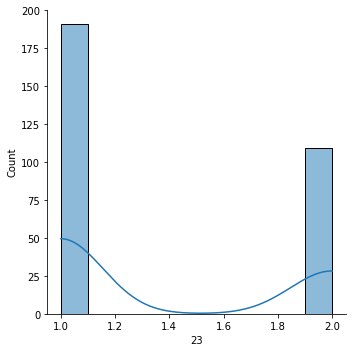

In [24]:
import seaborn as sns
sns.displot(dataframe[23],kde=True)

### Plot before Imputation.

F:\anaconda\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


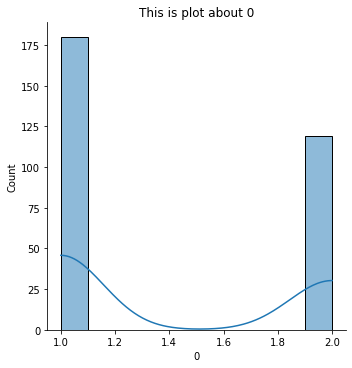

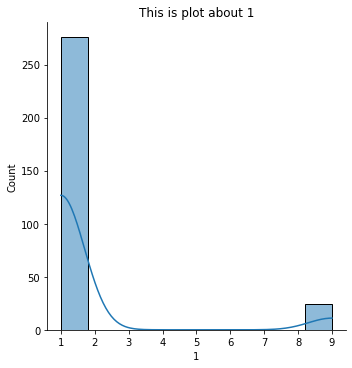

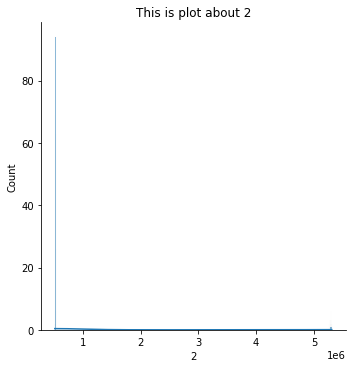

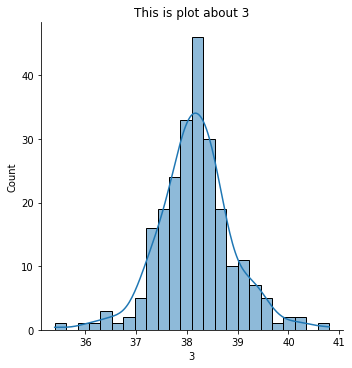

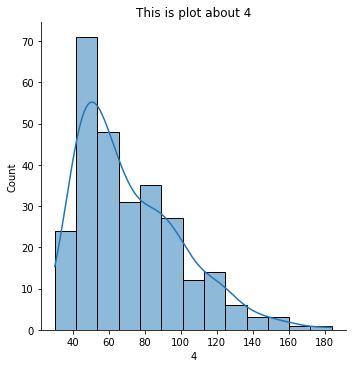

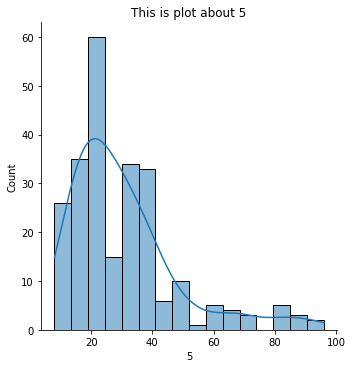

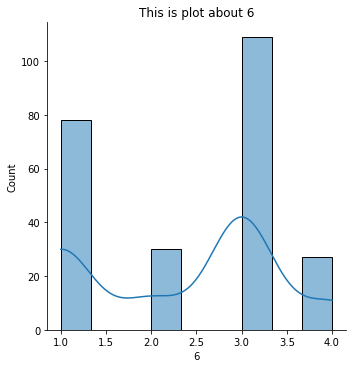

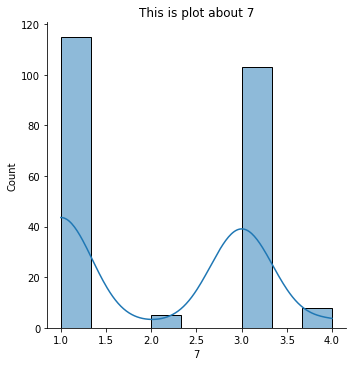

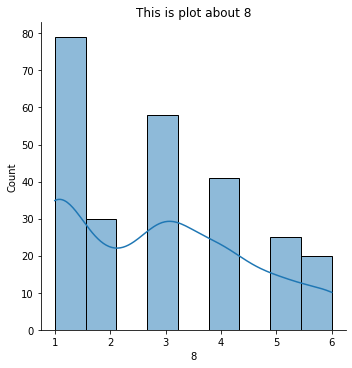

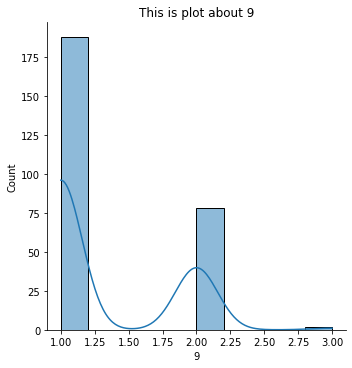

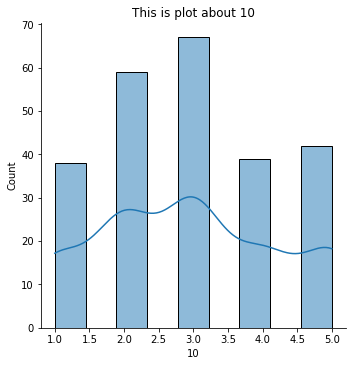

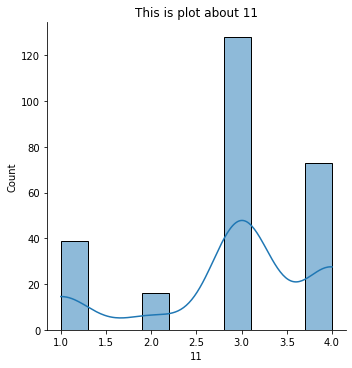

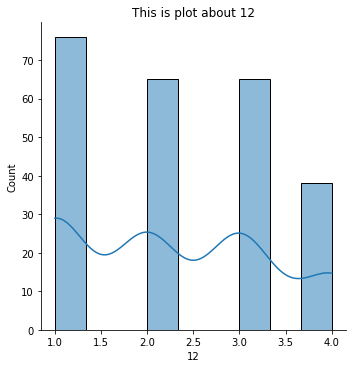

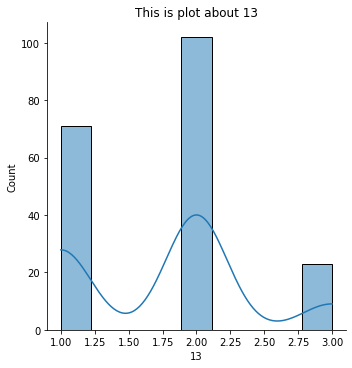

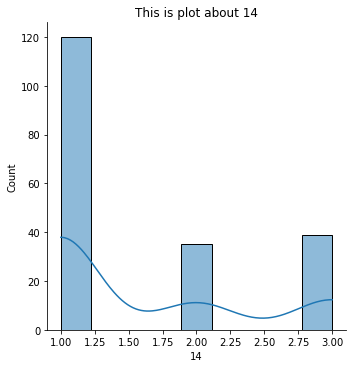

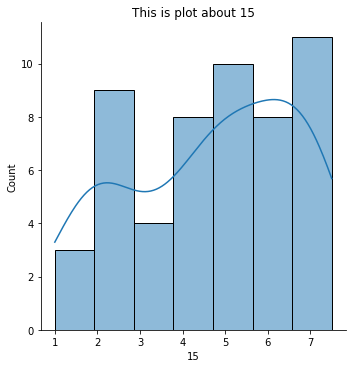

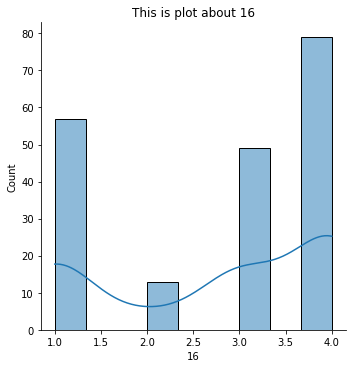

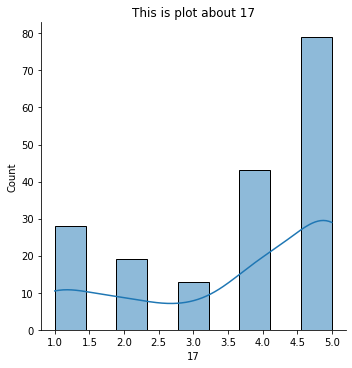

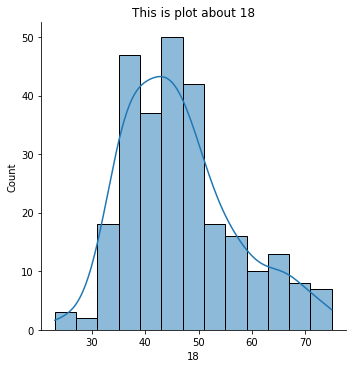

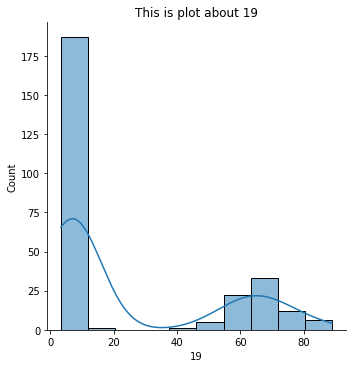

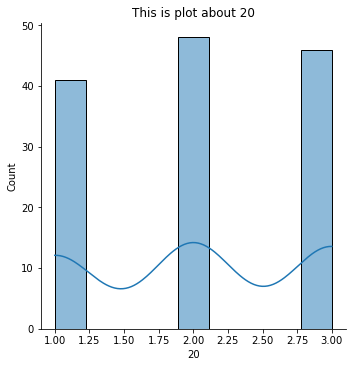

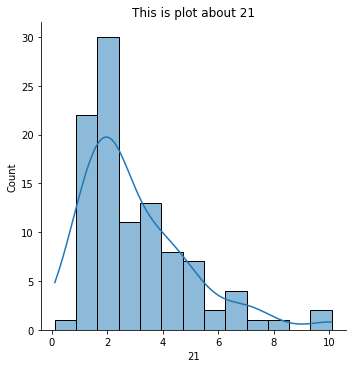

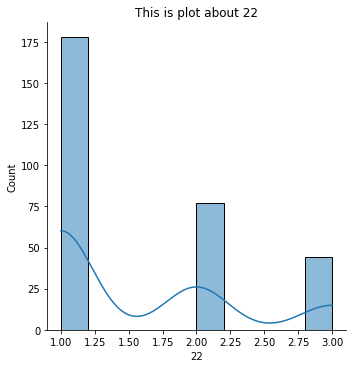

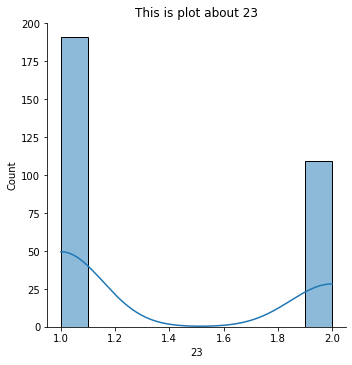

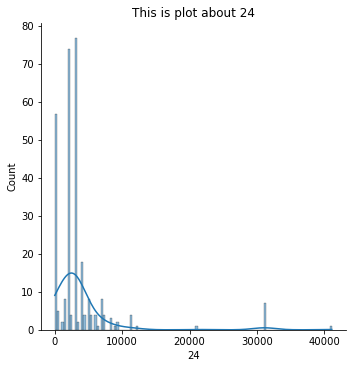

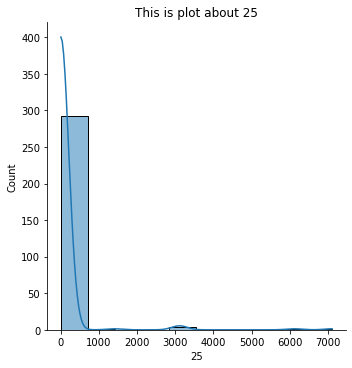

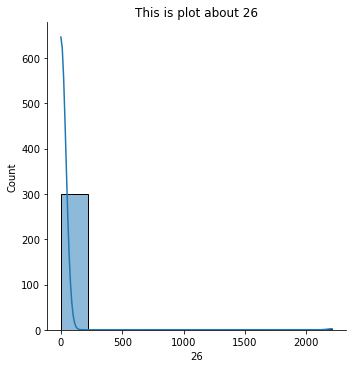

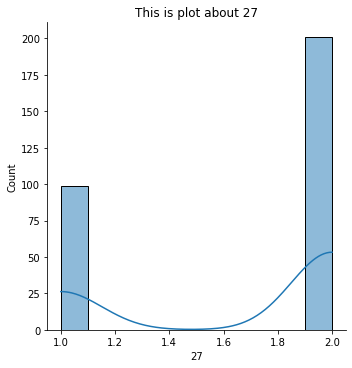

In [36]:
for i in range(28):
    import seaborn as sns
    sns.displot(dataframe[i],kde=True)
    plt.title('This is plot about {}'.format(i))
    print()

In [37]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(np.isnan(X).flatten()))

Missing: 1605


In [38]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [39]:
# fit on the dataset
imputer.fit(X)

KNNImputer()

In [40]:
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


In [41]:
Xtrans.shape

(300, 27)

In [48]:
data = pd.DataFrame(Xtrans,columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,2.0,1.0,530101.0,38.5,66.0,28.0,3.0,3.0,2.2,2.0,5.0,4.0,4.0,1.8,1.6,6.7,3.0,5.0,45.0,8.4,2.2,3.96,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.2,88.0,20.0,3.0,2.0,4.0,1.0,3.0,4.0,2.0,1.2,2.2,1.8,4.0,2.0,50.0,85.0,2.0,2.00,3.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.8,1.4,4.9,1.0,1.0,33.0,6.7,2.2,5.18,1.0,0.0,0.0,0.0,1.0
3,1.0,9.0,5290409.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,3.2,48.0,7.2,3.0,5.30,2.0,2208.0,0.0,0.0,1.0
4,2.0,1.0,530255.0,37.3,104.0,35.0,3.0,2.6,6.0,2.0,3.6,2.8,2.6,1.4,2.0,5.5,3.4,4.2,74.0,7.4,2.4,2.80,2.0,4300.0,0.0,0.0,2.0


### Plot After Imputation.

F:\anaconda\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


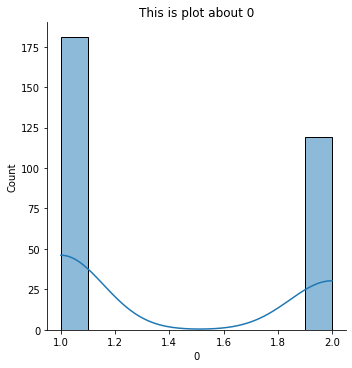

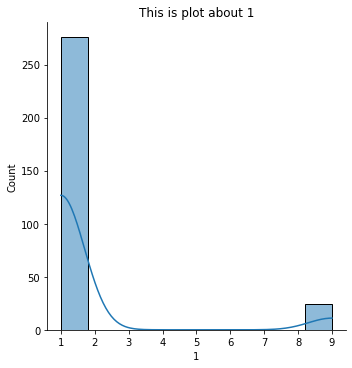

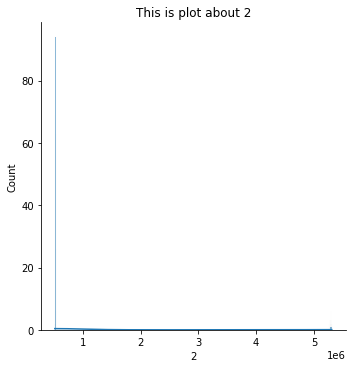

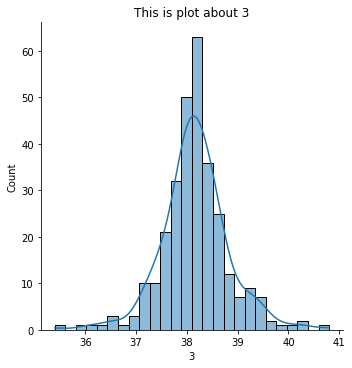

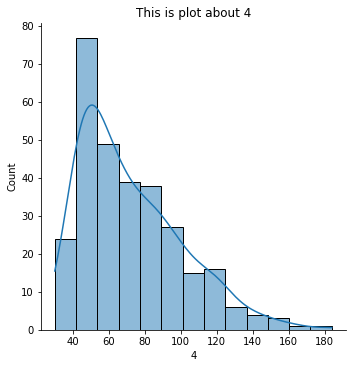

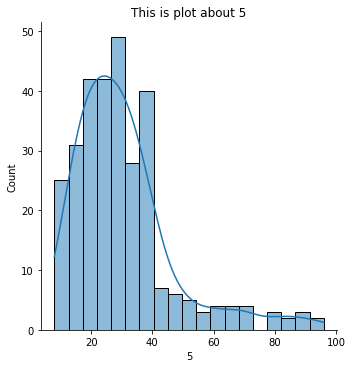

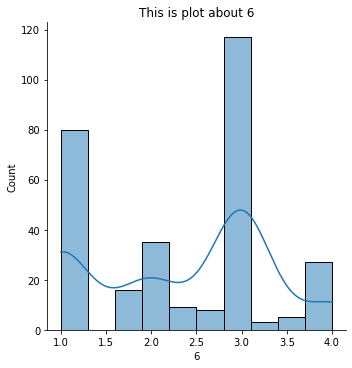

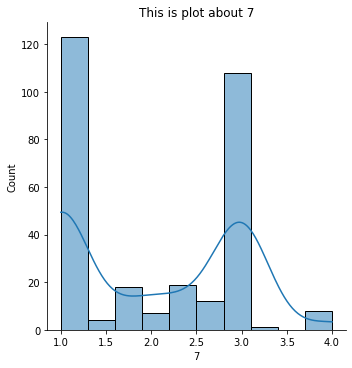

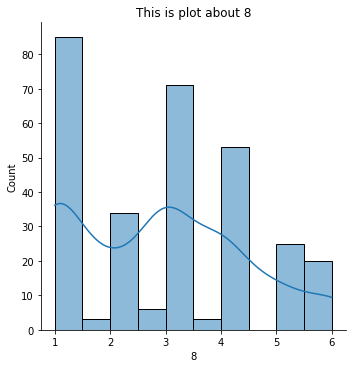

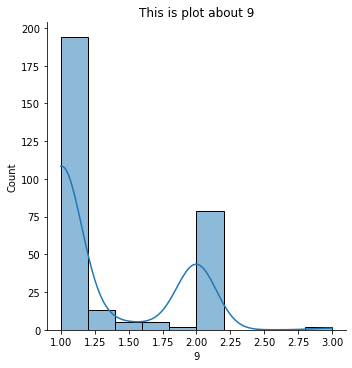

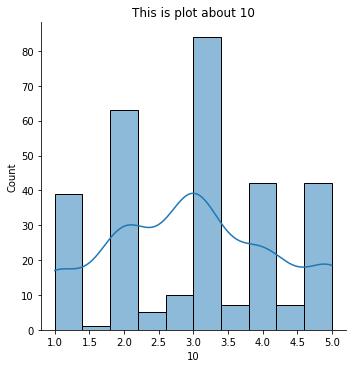

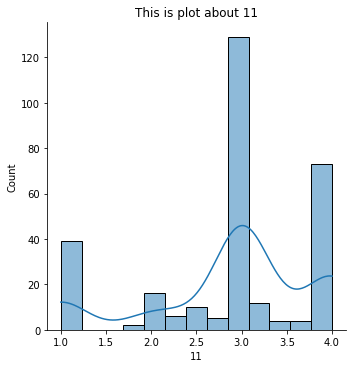

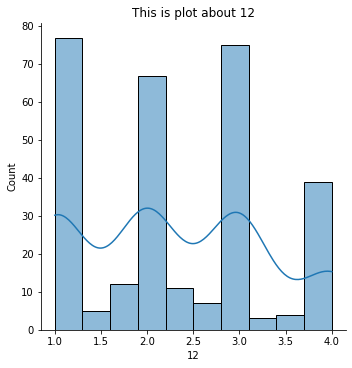

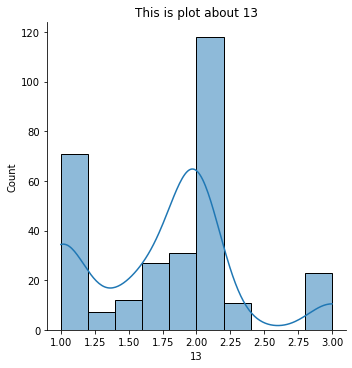

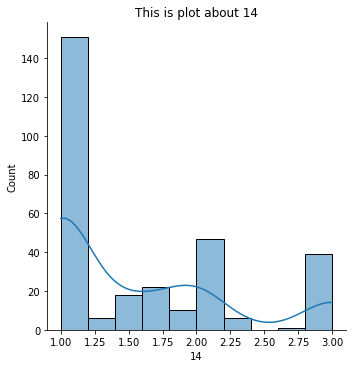

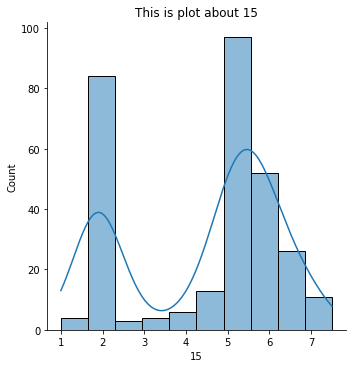

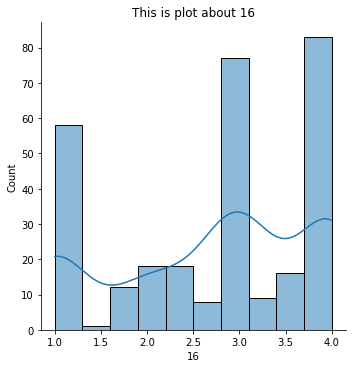

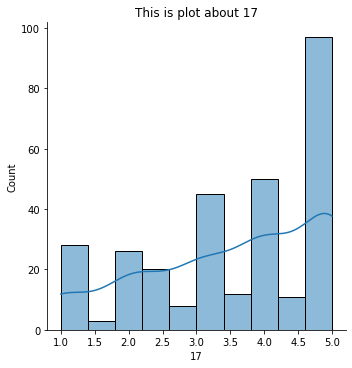

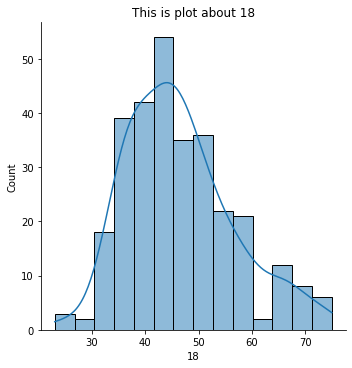

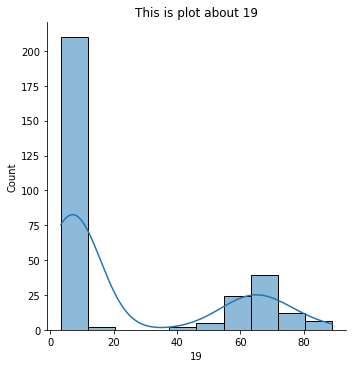

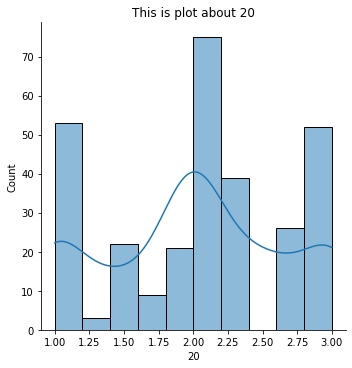

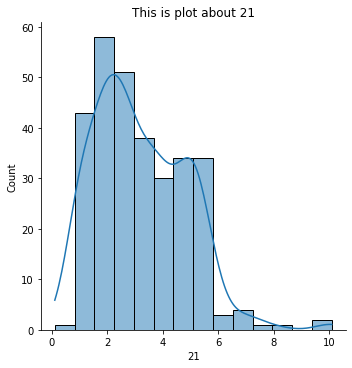

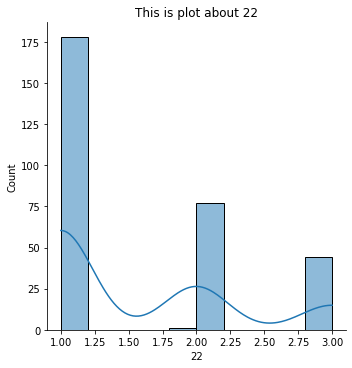

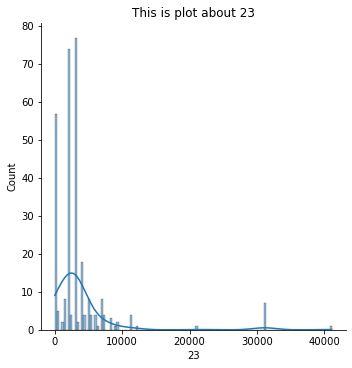

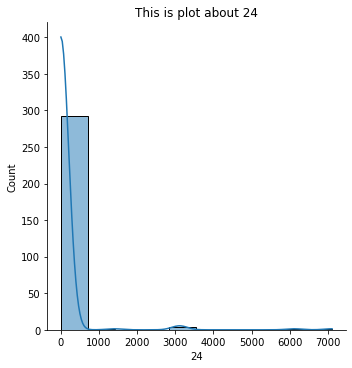

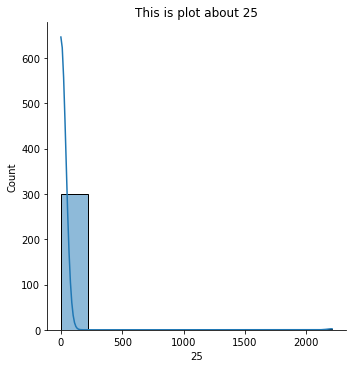

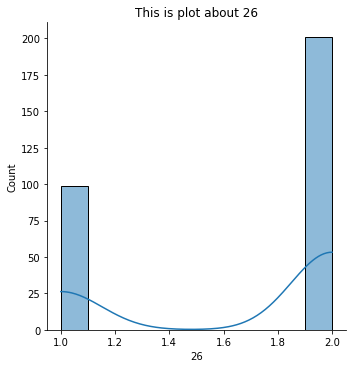

In [49]:
for i in range(27):
    import seaborn as sns
    sns.displot(data[i],kde=True)
    plt.title('This is plot about {}'.format(i))
    print()

### Pipeline Establishment.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [51]:
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

## Model Implementation.

In [52]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.859 (0.056)


## Simpleimputation :- Mean

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


## Simpleimputation :- Median

In [55]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


### Thanking You !!!